In [184]:
from google.colab import files
uploaded = files.upload()


Saving Salary Data.csv to Salary Data (2).csv


In [294]:
import pandas as pd
df = pd.read_csv("Salary Data.csv")

In [295]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


**Data cleaning**

In [296]:
data = df.drop_duplicates()
data=data.dropna()
data = data[data['Salary'] > 0]

In [297]:
from sklearn.preprocessing import LabelEncoder
# label code education level and gender and job title
label_encoder = LabelEncoder()
data['Education Level'] = label_encoder.fit_transform(data['Education Level'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Job Title']=label_encoder.fit_transform(data['Job Title'])
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0
...,...,...,...,...,...,...
348,28.0,0,0,68,1.0,35000.0
349,36.0,1,0,111,8.0,110000.0
350,44.0,0,2,115,16.0,160000.0
351,31.0,1,0,63,3.0,55000.0


In [298]:
from sklearn.model_selection import train_test_split
data_feature= data.drop(['Salary'], axis=1)
data_target=data['Salary']
x_train, x_test, y_train, y_test = train_test_split(data_feature,data_target, test_size= .2, random_state=42)

**Training model using linear regression from sklearn**

In [299]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)


LinearRegression()

In [300]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


y_pred=lr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 205754135.7172614
Root Mean Squared Error: 14344.132449097833
R-squared: 0.8911231066517087


**Feature selection for more data preprocessing**

<Axes: >

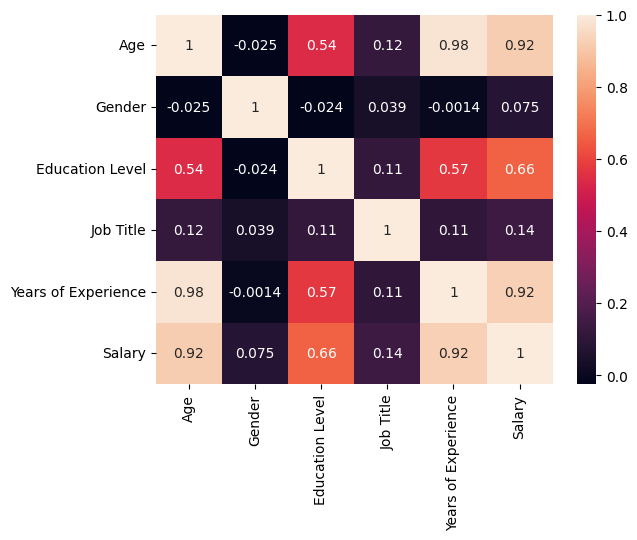

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True)

**Drop Age/Years of Experience, Gender, and job title**

In [302]:
data2 = data.drop( ['Age','Gender','Job Title'],  axis=1)
data2

,Education Level,Years of Experience,Salary
0,0,5.0,90000.0
1,1,3.0,65000.0
2,2,15.0,150000.0
3,0,7.0,60000.0
4,1,20.0,200000.0
...,...,...,...
348,0,1.0,35000.0
349,0,8.0,110000.0
350,2,16.0,160000.0
351,0,3.0,55000.0


In [303]:
data2_feature= data2.drop(['Salary'], axis=1)
data2_target=data2['Salary']
x_train,x_test,y_train,y_test=train_test_split(data2_feature,data2_target,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((259, 2), (65, 2), (259,), (65,))

In [304]:
from sklearn.linear_model import LinearRegression
LinearRegression=LinearRegression()
LinearRegression.fit(x_train,y_train)


LinearRegression()

In [305]:
y_pred=LinearRegression.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 261345421.8414046
Root Mean Squared Error: 16166.18142423883
R-squared: 0.8617064122589899


**Try using MLP**

In [306]:
# X=df3[['Age', 'Years of Experience','Gender_Female','Gender_Male','Education_Level_Encode']]
# y=df3["Salary"]
print(data)
X=data.drop(['Salary'],axis=1)
y=data['Salary']
X = (X - X.min()) / (X.max() - X.min())


      Age  Gender  Education Level  Job Title  Years of Experience    Salary
0    32.0       1                0        159                  5.0   90000.0
1    28.0       0                1         17                  3.0   65000.0
2    45.0       1                2        130                 15.0  150000.0
3    36.0       0                0        101                  7.0   60000.0
4    52.0       1                1         22                 20.0  200000.0
..    ...     ...              ...        ...                  ...       ...
348  28.0       0                0         68                  1.0   35000.0
349  36.0       1                0        111                  8.0  110000.0
350  44.0       0                2        115                 16.0  160000.0
351  31.0       1                0         63                  3.0   55000.0
371  43.0       1                1         30                 19.0  170000.0

[324 rows x 6 columns]


In [307]:
X.shape,y.shape

((324, 5), (324,))

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [309]:
import tensorflow as tf
mlp = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(5,)),  # Input layer with 4 features, with 4 rows and unknown columns
    tf.keras.layers.Dense(128, activation='relu'), # hidden layer with 256 units (64 nodes in this hidden layer),a ReLU activation(which is a function looks like ___/)
    tf.keras.layers.Dense(64, activation='relu'), # hidden layer with 32 units
    tf.keras.layers.Dense(256, activation='relu'), # hidden layer with 32 units
    tf.keras.layers.Dense(32, activation='relu'), # hidden layer with 32 units

    tf.keras.layers.Dense(1,activation='linear')  # Output layer with 1 unit (for sregression)
])


In [310]:
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [311]:
model = mlp.fit(X_train, y_train, epochs=500, batch_size=16, validation_split=0.2, callbacks=[earlystop])

Epoch 1/500
13/13 [==============================] - 1s 18ms/step - loss: 12013423616.0000 - val_loss: 15415957504.0000
Epoch 2/500
13/13 [==============================] - 0s 5ms/step - loss: 12012659712.0000 - val_loss: 15413899264.0000
Epoch 3/500
13/13 [==============================] - 0s 6ms/step - loss: 12008971264.0000 - val_loss: 15404496896.0000
Epoch 4/500
13/13 [==============================] - 0s 6ms/step - loss: 11994328064.0000 - val_loss: 15368654848.0000
Epoch 5/500
13/13 [==============================] - 0s 7ms/step - loss: 11943238656.0000 - val_loss: 15257917440.0000
Epoch 6/500
13/13 [==============================] - 0s 6ms/step - loss: 11796059136.0000 - val_loss: 14961518592.0000
Epoch 7/500
13/13 [==============================] - 0s 5ms/step - loss: 11438536704.0000 - val_loss: 14287117312.0000
Epoch 8/500
13/13 [==============================] - 0s 7ms/step - loss: 10683336704.0000 - val_loss: 12949661696.0000
Epoch 9/500
13/13 [============================

3/3 [==============================] - 0s 5ms/step


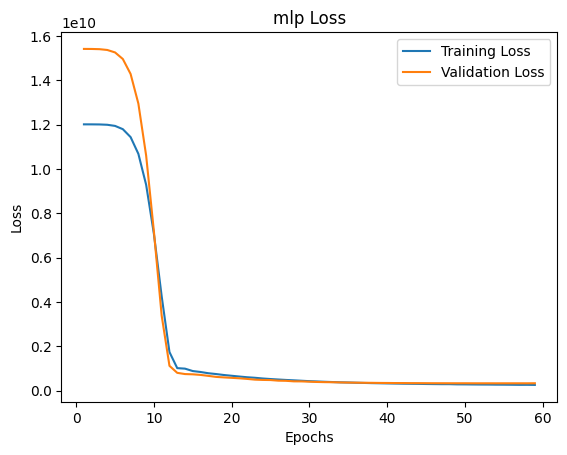

Mean Squared Error: 243586797.48541072
Root Mean Squared Error: 15607.267457354947
R-squared: 0.871103568934746


In [312]:
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label= 'Validation Loss')
plt.legend()
plt.title('mlp Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)